# Framinghan Heart Study.
La idea del siguiente cuaderno es una propuesta de **Natassha Selvaraj** en un articulo de Medium,
su proposito es que con base en la informacion extraida se pueda hacer un modelado para poder hacer una predicción de los pacientes que tienen riesgo de padecer de enfermedades coronarias.
Esto se hace a traves de un analisis de ML con Arboles de Decisión.
Mi propuesta sera:
* Hacer una limpieza correcta de los datos.
* Identificar las correlaciones de las variables.
* Modelar y generar los arboles de decision.
* Realizar validacion cruzada.
* Generar una vista grafica de los arboles.
* Generar un bosque aleatorio para intentar mejorar la precision del algoritmo.

In [29]:
#Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Arbol de decision
from sklearn.tree import DecisionTreeClassifier

#Visualizacion del arbol
from sklearn.tree import export_graphviz

#Para el bosque aleatorio.
from sklearn.ensemble import RandomForestClassifier




In [53]:
#Importacion del dataset
dataset = pd.read_csv("framingham.csv")
dataset.head(15)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Data Cleaning y un poco de analisis general
<p> El dataset reune una serie de factores medicos, de riesgo y demograficos que puedan ser determinantes
para que el paciente desarrolle CDH en un lapso de 10 años.
El dataset consta de 16 columnas en total de las cuales 15 son variables independientes y una es variable dependiente (la que se va a predecir).</p>

In [7]:
dataset.shape #4240 pacientes analizados.

(4240, 16)

In [88]:
#Busqueda de NA y arreglar la informacion.
def busca_na(column):
    return pd.notnull(dataset[column]).values.ravel().sum()



In [89]:
'''column = dataset.columns.values.tolist()

for c in column:
    print(c)
    print((busca_na(c)/dataset.shape[0])*100)'''

'column = dataset.columns.values.tolist()\n\nfor c in column:\n    print(c)\n    print((busca_na(c)/dataset.shape[0])*100)'

* El valor que mas falta es el de glucosa pero no representa una perdida importante de informacion.
* No todas las columnas tienen 100% de informacion. Se tiene que ver como se solucionara ese problema(primera diferencia con el articulo de Medium.
* En general se tiene que toda la informacion pueda no depender tanto de la edad del paciente sino de su forma de vida, por lo que a excepcion de la educacion una buena forma de trarar esta informacion sera por promedio.
* La educacion sera introducida de forma aleatoria. Asi el promedio generaliza de cierta forma a los datos. Pero tener educacion random evita el sezgo si se analiza la informacion.

In [24]:
#dataset.dtypes
#Todas las columnas son numericas.

In [28]:
#El rango es de personas de 32 años por lo que es muy probable que ya no esten estudiando.
#sorted(dataset["age"].unique().tolist())

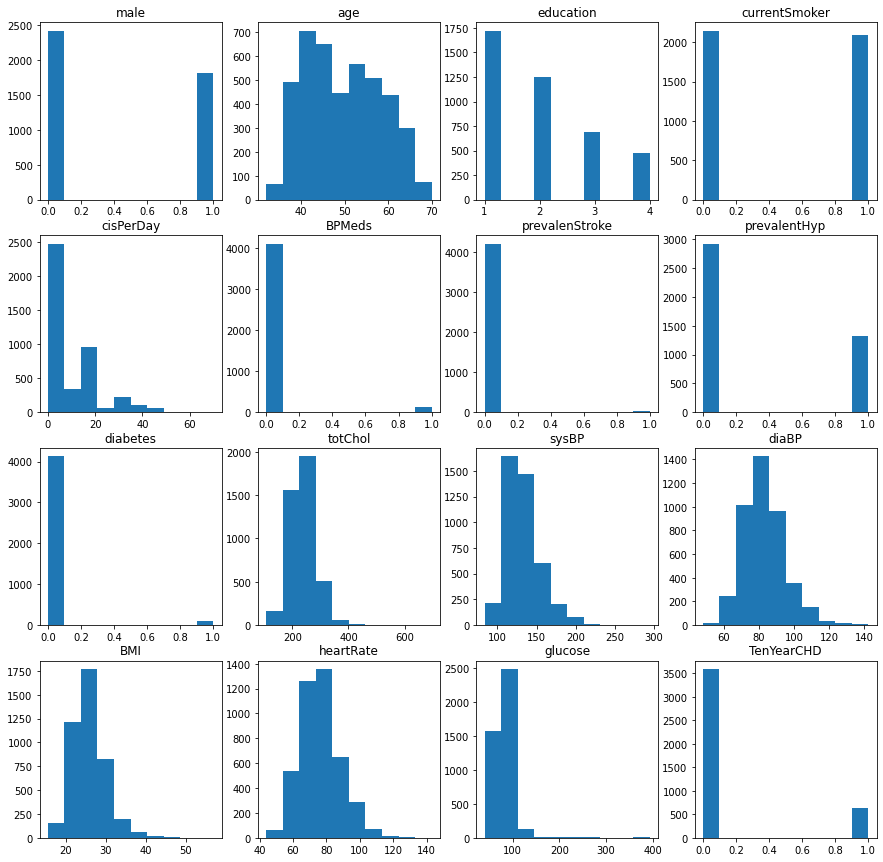

In [86]:
#plt.figure(figsize=(20,20))
fig, axs = plt.subplots(4, 4, figsize=(15,15))
axs[0, 0].hist(dataset["male"])
axs[0, 0].set_title('male')
axs[0, 1].hist(dataset["age"])
axs[0, 1].set_title('age')
axs[0, 2].hist(dataset["education"])
axs[0, 2].set_title('education')
axs[0, 3].hist(dataset["currentSmoker"])
axs[0, 3].set_title('currentSmoker')
axs[1, 0].hist(dataset["cigsPerDay"])
axs[1, 0].set_title('cisPerDay')
axs[1, 1].hist(dataset["BPMeds"])
axs[1, 1].set_title('BPMeds')
axs[1, 2].hist(dataset["prevalentStroke"])
axs[1, 2].set_title('prevalenStroke')
axs[1, 3].hist(dataset["prevalentHyp"])
axs[1, 3].set_title('prevalentHyp')
axs[2, 0].hist(dataset["diabetes"])
axs[2, 0].set_title('diabetes')
axs[2, 1].hist(dataset["totChol"])
axs[2, 1].set_title('totChol')
axs[2, 2].hist(dataset["sysBP"])
axs[2, 2].set_title('sysBP')
axs[2, 3].hist(dataset["diaBP"])
axs[2, 3].set_title('diaBP')
axs[3, 0].hist(dataset["BMI"])
axs[3, 0].set_title('BMI')
axs[3, 1].hist(dataset["heartRate"])
axs[3, 1].set_title('heartRate')
axs[3, 2].hist(dataset["glucose"])
axs[3, 2].set_title("glucose")
axs[3, 3].hist(dataset["TenYearCHD"])
axs[3, 3].set_title('TenYearCHD')
plt.show()

In [84]:
# Tratando los NA al fin.
#dataset["cigsPerDay"].fillna(np.ceil(dataset["cigsPerDay"].mean()),inplace=True)
#dataset["BPMeds"].fillna(np.floor(dataset["BPMeds"].mean()),inplace=True)
#dataset["totChol"].fillna(np.ceil(dataset["totChol"].mean()),inplace=True)
#dataset["BMI"].fillna((dataset["BMI"].mean()).round(decimals=2),inplace=True)
#dataset["heartRate"].fillna(np.ceil(dataset["heartRate"].mean()),inplace=True)
#dataset["glucose"].fillna(np.ceil(dataset["glucose"].mean()),inplace=True)

In [87]:
'''column = dataset.columns.values.tolist()

for c in column:
    print(c)
    print((busca_na(c)/dataset.shape[0])*100)'''

'column = dataset.columns.values.tolist()\n\nfor c in column:\n    print(c)\n    print((busca_na(c)/dataset.shape[0])*100)'

In [95]:
#Solo falta rellenar educacion con un numero aleatorio, asi el promedio no afecta. 
#np.random.seed(2022)
#dataset["education"].fillna(np.random.randint(1,4),inplace=True)

Ya con esto no deberia haber datos NA. Importare este nuevo dataset.

In [97]:
#dataset.to_csv("framinghamClean.csv")